In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from glob import glob
import os
import json 
import torch
from torch import nn
from torchvision import models
from torch.utils.data import Dataset
# from sklearn.metrics import f1_score
# from sklearn.model_selection import train_test_split

In [3]:
# sample = glob('/raid/workspace/honghee/hackathon_data/*')
sample = '/raid/workspace/honghee/hackathon_data/'

sample_csv = pd.read_csv('/raid/workspace/honghee/hackathon_data/aws/202010.csv')
# sample_csv = pd.read_csv(glob(sample+'aws/*.csv'))
sample_radar = cv2.imread(glob(sample+'radar_image/202010/*.png')[0])
sample_satelite = cv2.imread(glob(sample+'satelite_image/202010/*.png')[0])
sample_geojson = json.load(open(glob(sample+'labeled_data/weather_analysis_data/*.geojson')[0], 'r'))
# sample_json = json.load(open(glob(sample+'labeled_data/weather_news_data/dry/20201024/*.json')[0], 'r'))

In [4]:
sample_geojson
# sample_json

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [110.90332388877869, 28.985718243981353]},
   'properties': {'name': 'H_POINT'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [128.30566763877866, 41.299819261628386]},
   'properties': {'name': 'H_POINT'}},
  {'type': 'Feature',
   'geometry': {'type': 'Point',
    'coordinates': [136.45019531249997, 25.44327299759614]},
   'properties': {'name': 'L_POINT'}},
  {'type': 'Feature',
   'geometry': {'type': 'LineString',
    'coordinates': [[100.18066495656967, 37.961521904154125],
     [104.92675870656967, 37.451603871145394],
     [110.0830078125, 37.218663544507535],
     [114.95727628469467, 37.32648825786299],
     [120.02197265624999, 37.84015683604136],
     [122.48291015625, 38.20941023811602],
     [125.08300960063933, 38.69694324833793],
     [129.8876988887787, 39.831037183148595],
     [132.66723677515984, 40.505445604251435],
     

In [5]:
sample_csv

,Unnamed: 0,지점번호,시각,평균 기온,최고 기온,최저 기온,평균 풍속,합성 풍속,합성 풍향,최대 순간 풍속,최대 순간 풍속 풍향,평균 전운량,합계 강수량,평균 현지기압,평균 해면기압,이슬점온도,10분 평균 시정,운고
0,0,90,2020-10-01 01:00:00,15.2,15.3,15.0,2.3,2.3,294.1,4.4,293.3,8.0,0.0,1012.2,1014.3,12.4,20000.0,975.0
1,1,90,2020-10-01 02:00:00,15.1,15.2,15.0,1.8,1.8,286.2,3.4,279.2,8.0,0.0,1012.2,1014.3,12.3,20000.0,890.0
2,2,90,2020-10-01 03:00:00,15.1,15.2,15.0,1.6,1.6,282.8,3.0,273.5,8.0,0.0,1012.3,1014.4,12.2,20000.0,743.0
3,3,90,2020-10-01 04:00:00,15.0,15.1,15.0,1.5,1.5,282.5,3.0,276.4,8.0,0.0,1012.1,1014.2,12.1,20000.0,1008.0
4,4,90,2020-10-01 05:00:00,15.1,15.2,15.0,1.5,1.5,284.5,2.8,282.0,8.0,0.0,1012.5,1014.6,12.1,20000.0,920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476155,476155,989,2020-10-31 20:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
476156,476156,989,2020-10-31 21:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
476157,476157,989,2020-10-31 22:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
476158,476158,989,2020-10-31 23:00:00,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


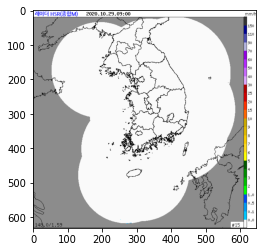

In [6]:
plt.imshow(cv2.cvtColor(sample_radar, cv2.COLOR_BGR2RGB))
plt.show()